In [20]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import sweetviz as sv
import dtale

import config

# 最大表示列数の指定（ここでは50列を指定）
pd.set_option("display.max_columns", 50)


def make_dir(dir_name: str):
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)

In [21]:
df_patient = pd.read_pickle(
    config.INTERIM_PICKLE_EDA_DIR + "/1.0-data_clinical_patient.pkl"
)
df_sample = pd.read_pickle(
    config.INTERIM_PICKLE_EDA_DIR + "/1.1-data_clinical_sample.pkl"
)

In [22]:
df_metabric_table = pd.concat([df_patient, df_sample], axis=1)
df_metabric_table.shape

(2509, 37)

In [23]:
df_metabric_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PATIENT_ID                           2509 non-null   object 
 1   LYMPH_NODES_EXAMINED_POSITIVE        2243 non-null   float64
 2   NPI                                  2287 non-null   float64
 3   COHORT                               2509 non-null   object 
 4   SEX                                  2509 non-null   object 
 5   INTCLUST                             2509 non-null   object 
 6   AGE_AT_DIAGNOSIS                     2498 non-null   float64
 7   OS_MONTHS                            1981 non-null   float64
 8   OS_STATUS                            2509 non-null   bool   
 9   CLAUDIN_SUBTYPE                      2509 non-null   object 
 10  THREEGENE                            2509 non-null   object 
 11  VITAL_STATUS                  

In [24]:
df_metabric_table.head()

,PATIENT_ID,LYMPH_NODES_EXAMINED_POSITIVE,NPI,COHORT,SEX,INTCLUST,AGE_AT_DIAGNOSIS,OS_MONTHS,OS_STATUS,CLAUDIN_SUBTYPE,THREEGENE,VITAL_STATUS,LATERALITY,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,RFS_STATUS,RFS_MONTHS,CELLULARITY_converted,ER_IHC_converted,HER2_SNP6_converted,INFERRED_MENOPAUSAL_STATE_converted,CHEMOTHERAPY_converted,HORMONE_THERAPY_converted,RADIO_THERAPY_converted,PATIENT_ID,SAMPLE_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,GRADE,ONCOTREE_CODE,SAMPLE_TYPE,TUMOR_SIZE,TUMOR_STAGE,TMB_NONSYNONYMOUS,ER_STATUS_converted,HER2_STATUS_converted,PR_STATUS_converted
0,MB-0000,10.0,6.044,1.0,Female,4ER+,75.65,140.500000,False,claudin-low,ER-/HER2-,Living,Right,Ductal/NST,MASTECTOMY,False,138.65,NaN,1.0,2.0,1.0,False,True,True,MB-0000,MB-0000,Breast Cancer,Breast Invasive Ductal Carcinoma,3.0,IDC,Primary,22.0,2.0,0.000000,1.0,-1.0,-1.0
1,MB-0002,0.0,4.020,1.0,Female,4ER+,43.19,84.633333,False,LumA,ER+/HER2- High Prolif,Living,Right,Ductal/NST,BREAST CONSERVING,False,83.52,3.0,1.0,2.0,-1.0,False,True,True,MB-0002,MB-0002,Breast Cancer,Breast Invasive Ductal Carcinoma,3.0,IDC,Primary,10.0,1.0,2.615035,1.0,-1.0,1.0
2,MB-0005,1.0,4.030,1.0,Female,3,48.87,163.700000,True,LumB,nan,Died of Disease,Right,Ductal/NST,MASTECTOMY,True,151.28,3.0,1.0,2.0,-1.0,True,True,False,MB-0005,MB-0005,Breast Cancer,Breast Invasive Ductal Carcinoma,2.0,IDC,Primary,15.0,2.0,2.615035,1.0,-1.0,1.0
3,MB-0006,3.0,4.050,1.0,Female,9,47.68,164.933333,False,LumB,nan,Living,Right,Mixed,MASTECTOMY,False,162.76,2.0,1.0,2.0,-1.0,True,True,True,MB-0006,MB-0006,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,2.0,MDLC,Primary,25.0,2.0,1.307518,1.0,-1.0,1.0
4,MB-0008,8.0,6.080,1.0,Female,9,76.97,41.366667,True,LumB,ER+/HER2- High Prolif,Died of Disease,Right,Mixed,MASTECTOMY,True,18.55,3.0,1.0,2.0,1.0,True,True,True,MB-0008,MB-0008,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,3.0,MDLC,Primary,40.0,2.0,2.615035,1.0,-1.0,1.0


In [25]:
target_columns = [
    # patient
    "OS_MONTHS",
    "RFS_MONTHS",
    "OS_STATUS",
    "RFS_STATUS",
    "VITAL_STATUS",
]

int_columns = [
    # patient
    "LYMPH_NODES_EXAMINED_POSITIVE",
    "OS_MONTHS",
    "RFS_MONTHS",
]

float_columns = [
    # patient
    "NPI",
    "AGE_AT_DIAGNOSIS",
    # sample
    "TUMOR_SIZE",
    "TMB_NONSYNONYMOUS",
]

str_columns = []

# 質的変数（順序尺度）
qualitative_ordinal_columns = [
    # patient
    "CELLULARITY_converted",
    "ER_IHC_converted",
    "HER2_SNP6_converted",
    "INFERRED_MENOPAUSAL_STATE_converted",
    # sample
    "ER_STATUS_converted",
    "HER2_STATUS_converted",
    "GRADE",
    "PR_STATUS_converted",
    "TUMOR_STAGE",
]
# 質的変数（名義尺度）
qualitative_name_columns = [
    # patient
    "COHORT",
    "INTCLUST",
    "CLAUDIN_SUBTYPE",
    "THREEGENE",
    "HISTOLOGICAL_SUBTYPE",
    "BREAST_SURGERY",
    "LATERALITY",
    "VITAL_STATUS",
    # sample
    "CANCER_TYPE",
    "CANCER_TYPE_DETAILED",
    "ONCOTREE_CODE",
]

bool_columns = [
    # patient
    "CHEMOTHERAPY_converted",
    "HORMONE_THERAPY_converted",
    "RADIO_THERAPY_converted",
    "OS_STATUS",
    "RFS_STATUS",
]

meanless_columns = [
    # patient
    "PATIENT_ID",
    "SEX",
    # sample
    "PATIENT_ID",
    "SAMPLE_ID",
    "SAMPLE_TYPE",
]

print(
    df_metabric_table.shape[1],
    len(int_columns)
    + len(float_columns)
    + len(str_columns)
    + len(qualitative_ordinal_columns)
    + len(qualitative_name_columns)
    + len(bool_columns)
    + len(meanless_columns),
)
assert df_metabric_table.shape[1] == len(int_columns) + len(float_columns) + len(
    str_columns
) + len(qualitative_ordinal_columns) + len(qualitative_name_columns) + len(
    bool_columns
) + len(
    meanless_columns
), "lack or too much columns"

37 37


## 各特徴量のエンコーディング確認

In [26]:
df_metabric_table[qualitative_ordinal_columns].dtypes

CELLULARITY_converted                  float64
ER_IHC_converted                       float64
HER2_SNP6_converted                    float64
INFERRED_MENOPAUSAL_STATE_converted    float64
ER_STATUS_converted                    float64
HER2_STATUS_converted                  float64
GRADE                                  float64
PR_STATUS_converted                    float64
TUMOR_STAGE                            float64
dtype: object

In [27]:
df_metabric_table[qualitative_name_columns].dtypes

COHORT                  object
INTCLUST                object
CLAUDIN_SUBTYPE         object
THREEGENE               object
HISTOLOGICAL_SUBTYPE    object
BREAST_SURGERY          object
LATERALITY              object
VITAL_STATUS            object
CANCER_TYPE             object
CANCER_TYPE_DETAILED    object
ONCOTREE_CODE           object
dtype: object

In [28]:
df_metabric_table[qualitative_name_columns].head()

,COHORT,INTCLUST,CLAUDIN_SUBTYPE,THREEGENE,HISTOLOGICAL_SUBTYPE,BREAST_SURGERY,LATERALITY,VITAL_STATUS,CANCER_TYPE,CANCER_TYPE_DETAILED,ONCOTREE_CODE
0,1.0,4ER+,claudin-low,ER-/HER2-,Ductal/NST,MASTECTOMY,Right,Living,Breast Cancer,Breast Invasive Ductal Carcinoma,IDC
1,1.0,4ER+,LumA,ER+/HER2- High Prolif,Ductal/NST,BREAST CONSERVING,Right,Living,Breast Cancer,Breast Invasive Ductal Carcinoma,IDC
2,1.0,3,LumB,nan,Ductal/NST,MASTECTOMY,Right,Died of Disease,Breast Cancer,Breast Invasive Ductal Carcinoma,IDC
3,1.0,9,LumB,nan,Mixed,MASTECTOMY,Right,Living,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,MDLC
4,1.0,9,LumB,ER+/HER2- High Prolif,Mixed,MASTECTOMY,Right,Died of Disease,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,MDLC


In [29]:
df_metabric_table[bool_columns].dtypes

CHEMOTHERAPY_converted       bool
HORMONE_THERAPY_converted    bool
RADIO_THERAPY_converted      bool
OS_STATUS                    bool
RFS_STATUS                   bool
dtype: object

In [30]:
# pickleとして保存
make_dir(config.INTERIM_PICKLE_EDA_DIR)
df_metabric_table.to_pickle(
    config.INTERIM_PICKLE_EDA_DIR + "/1.2-data_metabric_table.pkl"
)

# 生存曲線の観察

lifelinesというライブラリがあったので、試してみる。
https://lifelines.readthedocs.io/en/latest/index.html

In [31]:
from lifelines import KaplanMeierFitter
from lifelines.utils import concordance_index
from lifelines import KaplanMeierFitter

In [32]:
# PATIENT_IDにMBを含むデータのみ含むデータフレームを読み込み
df_MB = pd.read_pickle(config.INTERIM_PICKLE_PREPROCESSED_DIR + "/2.0-df_MB.pkl")
df_MB.shape

(1985, 36)

In [33]:
df_MB.columns

Index(['PATIENT_ID', 'LYMPH_NODES_EXAMINED_POSITIVE', 'NPI', 'CELLULARITY',
       'CHEMOTHERAPY', 'COHORT', 'ER_IHC', 'HER2_SNP6', 'HORMONE_THERAPY',
       'INFERRED_MENOPAUSAL_STATE', 'SEX', 'INTCLUST', 'AGE_AT_DIAGNOSIS',
       'OS_MONTHS', 'OS_STATUS', 'CLAUDIN_SUBTYPE', 'THREEGENE',
       'VITAL_STATUS', 'LATERALITY', 'RADIO_THERAPY', 'HISTOLOGICAL_SUBTYPE',
       'BREAST_SURGERY', 'RFS_STATUS', 'RFS_MONTHS', 'SAMPLE_ID',
       'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'ER_STATUS', 'HER2_STATUS',
       'GRADE', 'ONCOTREE_CODE', 'PR_STATUS', 'SAMPLE_TYPE', 'TUMOR_SIZE',
       'TUMOR_STAGE', 'TMB_NONSYNONYMOUS'],
      dtype='object')

<AxesSubplot:xlabel='timeline'>

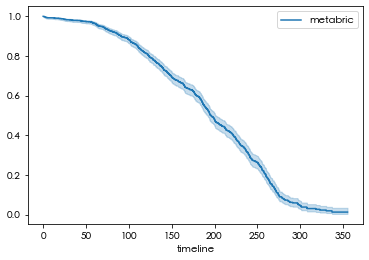

In [34]:
T = df_MB["OS_MONTHS"].dropna()
E = (
    df_MB["OS_STATUS"].dropna().map({"0:LIVING": 1, "1:DECEASED": 0})
)  # lifelinesを描くので、生存が1, 死亡が0

kmf = KaplanMeierFitter(label="metabric")
kmf.fit(T, E)
kmf.plot()